In [ ]:
#importing the packages
import pandas as pd
import numpy as np
from numpy import isnan
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
import datetime
from google.colab import files
uploaded = files.upload()

Saving Coastal Data System - Waves.csv to Coastal Data System - Waves.csv


## Data Preprocessing and EDA


In [ ]:
#loading the dataset into our main dataframe df1
df1 = pd.read_csv("Coastal Data System - Waves.csv")
#Describing the data
df1.describe()

,Hs,Hmax,Tz,Tp,Peak Direction,SST
count,43730.00000,43730.000000,43730.000000,43730.000000,43730.000000,43730.000000
mean,1.04114,1.891776,5.412364,8.794855,97.395703,23.207433
std,4.48582,4.580724,4.739217,5.358757,28.782570,9.813160
min,-99.90000,-99.900000,-99.900000,-99.900000,-99.900000,-99.900000
25%,0.83800,1.410000,4.974000,7.286000,85.000000,21.900000
50%,1.12900,1.900000,5.525000,8.881000,99.000000,23.950000
75%,1.54200,2.600000,6.162000,10.663000,116.000000,26.050000
max,4.25700,7.906000,10.921000,21.121000,358.000000,28.650000


In [ ]:
#for obtaining further info about datatype and count
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43730 entries, 0 to 43729
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date/Time       43730 non-null  object 
 1   Hs              43730 non-null  float64
 2   Hmax            43730 non-null  float64
 3   Tz              43730 non-null  float64
 4   Tp              43730 non-null  float64
 5   Peak Direction  43730 non-null  float64
 6   SST             43730 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.3+ MB


 We first obtain the rudimentary information abour our data's distribution, it's count, etc. from our describe() and info() functions. We find that there are 43730 entries in our dataset and aside from our Date/Time column all the variables are of type float.


In [ ]:
#checking for missing values
df1.isnull().sum()

Date/Time         0
Hs                0
Hmax              0
Tz                0
Tp                0
Peak Direction    0
SST               0
dtype: int64

Null values are checked for as the first step of preprocessing and we find none.
However upon observing the data we see that the format of the Date/Time column changes periodically. So we standardize the date format for simplifying our analysis.

In [ ]:
#standardizing the date format
df1['Date/Time'] = pd.to_datetime(df1['Date/Time']).dt.strftime('%d-%m-%y %H:%M')

In [ ]:
#observing first 14 rows
df1.head(14)

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,01-01-17 00:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90
1,01-01-17 00:30,0.875,1.39,4.421,4.506,-99.9,-99.90
2,01-01-17 01:00,0.763,1.15,4.520,5.513,49.0,25.65
3,01-01-17 01:30,0.770,1.41,4.582,5.647,75.0,25.50
4,01-01-17 02:00,0.747,1.16,4.515,5.083,91.0,25.45
5,01-01-17 02:30,0.718,1.61,4.614,6.181,68.0,25.45
6,01-01-17 03:00,0.707,1.34,4.568,4.705,73.0,25.50
7,01-01-17 03:30,0.729,1.21,4.786,4.484,63.0,25.50
8,01-01-17 04:00,0.733,1.20,4.897,5.042,68.0,25.50
9,01-01-17 04:30,0.711,1.29,5.019,8.439,66.0,25.50


From the above dataframe we can observe a lot of erroneous values of -99.9 which essentially act as the null values for our dataset, which we drop after converting it to null

In [ ]:
#replacing -99.9 with null and dropping the resulting null rows
df1.replace(-99.90, np.nan, inplace=True)
df1.dropna(inplace=True)

In [ ]:
#observing the first 14 records
df1.head(14)

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
2,01-01-17 01:00,0.763,1.15,4.520,5.513,49.0,25.65
3,01-01-17 01:30,0.770,1.41,4.582,5.647,75.0,25.50
4,01-01-17 02:00,0.747,1.16,4.515,5.083,91.0,25.45
5,01-01-17 02:30,0.718,1.61,4.614,6.181,68.0,25.45
6,01-01-17 03:00,0.707,1.34,4.568,4.705,73.0,25.50
7,01-01-17 03:30,0.729,1.21,4.786,4.484,63.0,25.50
8,01-01-17 04:00,0.733,1.20,4.897,5.042,68.0,25.50
9,01-01-17 04:30,0.711,1.29,5.019,8.439,66.0,25.50
10,01-01-17 05:00,0.698,1.11,4.867,4.584,64.0,25.55
11,01-01-17 05:30,0.686,1.14,4.755,5.211,56.0,25.55


We can observe that the previous two preprocessing steps has significantly changed the description of our data, with new values for all the meausures. 
The number of rows has dropped from the original 43730 to 43456 

In [ ]:
#describing the data to observe change in the dataset
df1.describe()

,Hs,Hmax,Tz,Tp,Peak Direction,SST
count,43456.000000,43456.000000,43456.000000,43456.000000,43456.000000,43456.000000
mean,1.237790,2.090113,5.619708,9.011929,98.626933,23.949631
std,0.528605,0.897631,0.928549,2.390103,24.274900,2.231002
min,0.294000,0.510000,3.076000,2.720000,5.000000,19.800000
25%,0.839000,1.410000,4.981000,7.292000,85.000000,21.900000
50%,1.130000,1.900000,5.530000,8.886000,101.000000,23.950000
75%,1.544000,2.600000,6.166000,10.677000,116.000000,26.050000
max,4.257000,7.906000,10.921000,21.121000,358.000000,28.650000


In [ ]:
#extracting year and month of our entries into two separate columns for help in further analysis
df1['year'] = pd.DatetimeIndex(df1['Date/Time']).year
df1['month'] = pd.DatetimeIndex(df1['Date/Time']).month
df1

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST,year,month
2,01-01-17 01:00,0.763,1.15,4.520,5.513,49.0,25.65,2017,1
3,01-01-17 01:30,0.770,1.41,4.582,5.647,75.0,25.50,2017,1
4,01-01-17 02:00,0.747,1.16,4.515,5.083,91.0,25.45,2017,1
5,01-01-17 02:30,0.718,1.61,4.614,6.181,68.0,25.45,2017,1
6,01-01-17 03:00,0.707,1.34,4.568,4.705,73.0,25.50,2017,1
...,...,...,...,...,...,...,...,...,...
43725,30-06-19 21:30,2.299,3.60,9.281,12.765,94.0,21.95,2019,6
43726,30-06-19 22:00,2.075,3.04,9.303,12.722,95.0,21.95,2019,6
43727,30-06-19 22:30,2.157,3.43,9.168,12.890,97.0,21.95,2019,6
43728,30-06-19 23:00,2.087,2.84,8.706,10.963,92.0,21.95,2019,6


In [ ]:
#checking for duplicate entries
dup = df1.duplicated()
print(dup.any())

True


In [ ]:
#dropping duplicate entries
df1 = df1.drop_duplicates()

Duplicate entries are also checked for as a preprocessing step and the duplicate rows are subsequently dropped.
The description of the data shows that there were 2 duplicate rows dropped.

In [ ]:
#describing to check the change in the values
df1.describe()

,Hs,Hmax,Tz,Tp,Peak Direction,SST,year,month
count,43454.000000,43454.000000,43454.000000,43454.000000,43454.000000,43454.000000,43454.000000,43454.000000
mean,1.237799,2.090125,5.619685,9.011972,98.626594,23.949641,2017.800110,5.939430
std,0.528608,0.897640,0.928533,2.390107,24.275165,2.231022,0.747132,3.395868
min,0.294000,0.510000,3.076000,2.720000,5.000000,19.800000,2017.000000,1.000000
25%,0.839000,1.410000,4.981000,7.292000,85.000000,21.900000,2017.000000,3.000000
50%,1.130000,1.900000,5.530000,8.886000,101.000000,23.950000,2018.000000,6.000000
75%,1.544000,2.600000,6.166000,10.677000,116.000000,26.050000,2018.000000,9.000000
max,4.257000,7.906000,10.921000,21.121000,358.000000,28.650000,2019.000000,12.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6cb7ceca50>,
      dtype=object)

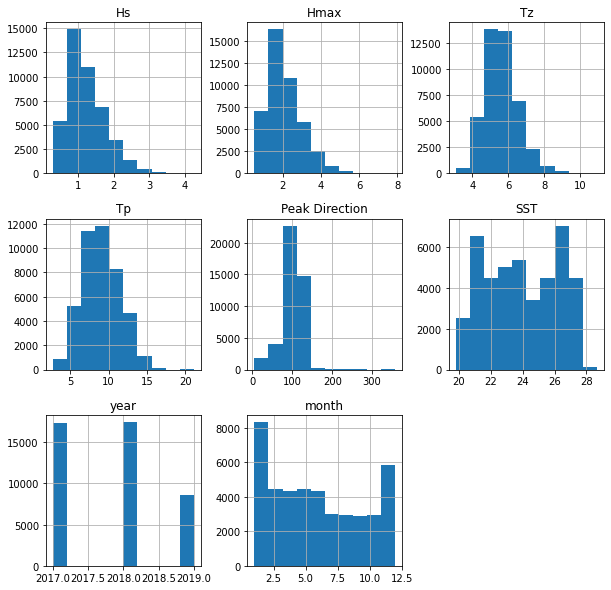

In [ ]:
#plotting histograms to observe normality 
df1.hist(figsize=(10,10))

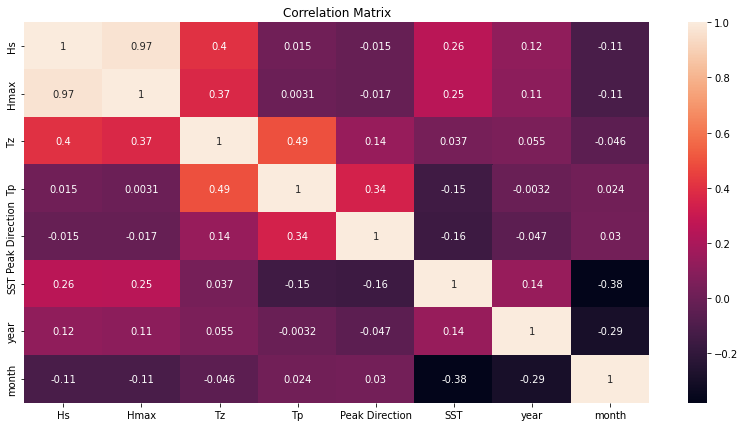

In [ ]:
#plotting a correlation matrix 
fig = plt.figure(figsize=(14,7))
sns.heatmap(df1.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show();

We plot a correlation matrix to observe and understand the degree of
correlation between our variables. The variables Hs and Hmax are found to be highly correlated, which seems understandable as they are both calculated in a similar fashion.

SST was a feature that could have been expected to have a stromger correlation with the Hs and Hmax features, but surprisingly is weakly correlated with them.

The peak direction is found to be negatively correlated with the wave height variables suggesting that for a higher degree of wave direction, the wave heights tend to be smaller.

A pairplot is plotted to visualize our findings from the correlation matrix


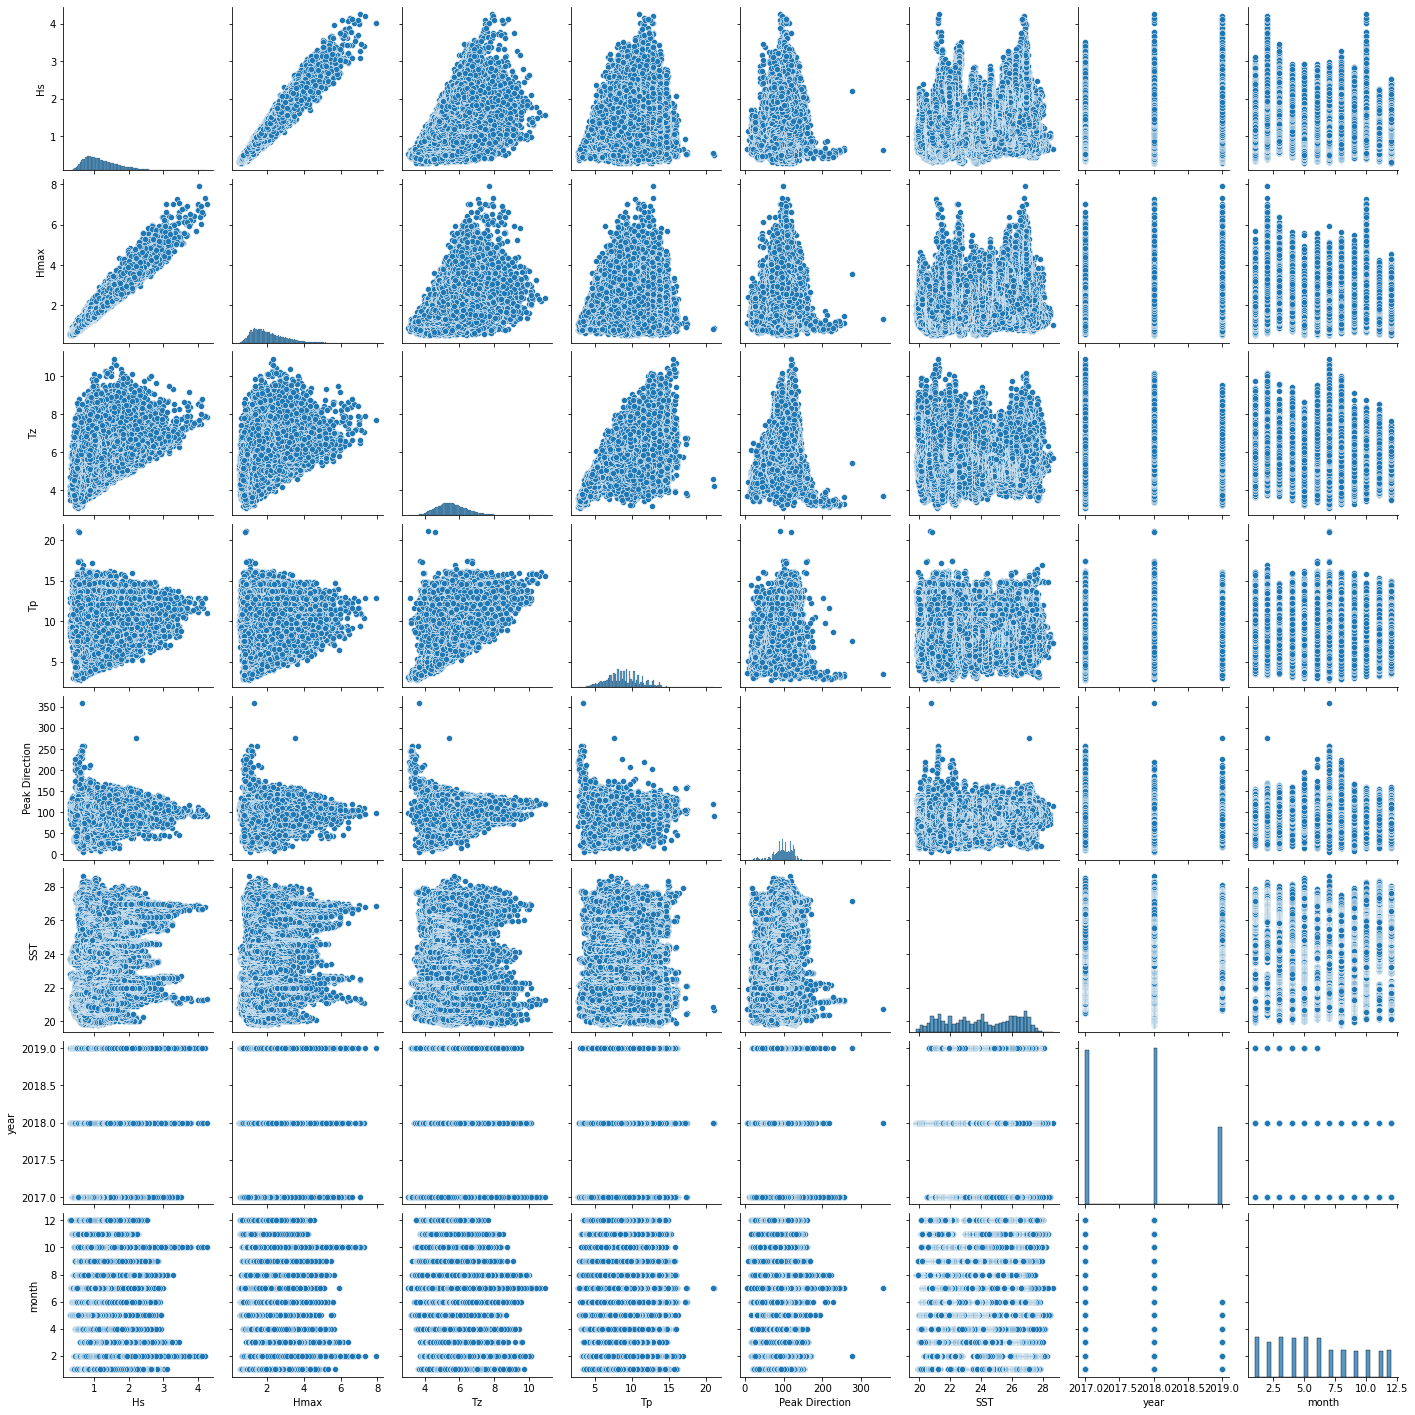

In [ ]:
#plotting a pairplot
sns.pairplot(df1)

Next we visualize the variation of our aggregated maximum wave height for all three years of 2017,2018 and 2019. We plot this height against the sea surface temperature across the years.
The aggregated graph shows that the wave heights are the maximum for temperatures ranging between 24 and 26 degrees celsius and are low for lower temperatures and temperatures higher than our 24-26 range.

We also plot the variation of maximum wave height against the sea temperature for all the three years seperately. This shows an interesting pattern in the wave heights for the year 2019 which has a sharp peak and drop in the 22 to 25 degrees range. Hwoever, the 2017 and 2018 wave heights appear to have a similar pattern.

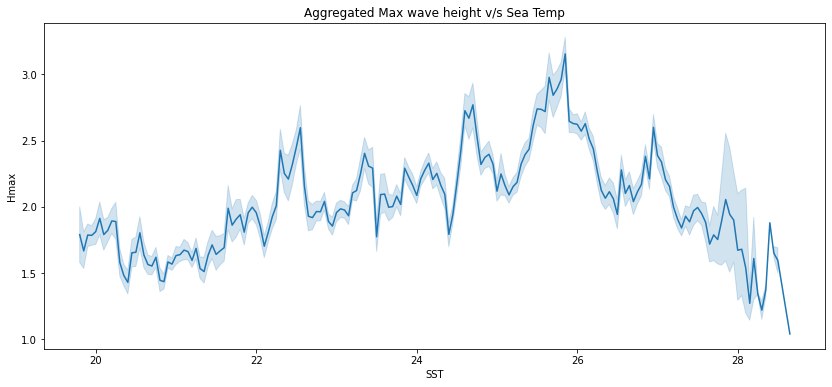

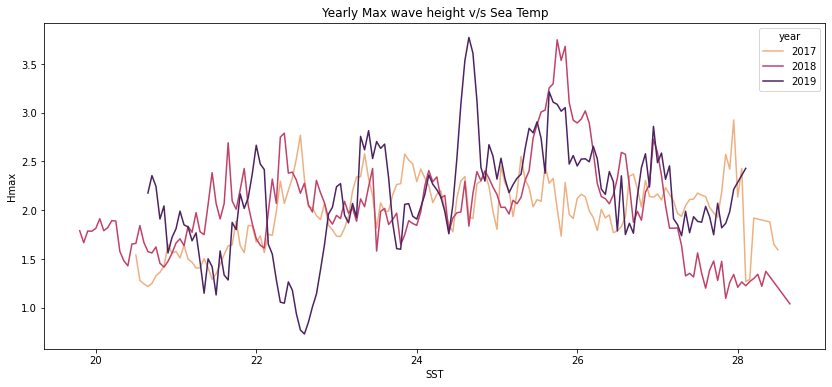

In [ ]:
#plotting the aggregated maximum wave height across the sea surface temperatures
plt.figure(figsize=(14,6))
plt.title("Aggregated Max wave height v/s Sea Temp")
sns.lineplot(x="SST", y="Hmax",palette = "flare",data=df1)

#plotting the maximum wave height for the three years across the sea surface temperatures
plt.figure(figsize=(14,6))
plt.title("Yearly Max wave height v/s Sea Temp")
sns.lineplot(x="SST", y="Hmax", hue = "year",palette = "flare", ci= None,data=df1)


Next we visualize the trend of the aggregated sea surface temperature across a year. We find that the warmest temperatures occur betwen January to March, while the coolest temperatures are recorded in the months of June, July and August.
We have data upto June for the year 2019, which is found to have a similar pattern to that of the 2017 and 2018 sea temperatures.

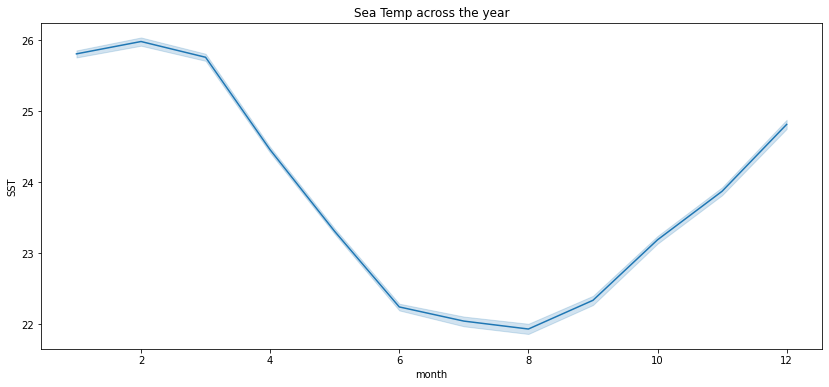

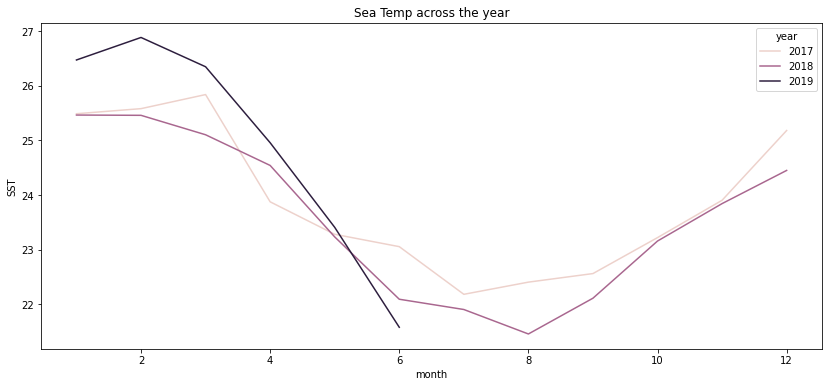

In [ ]:
#plotting the aggregated sea surface temperatures across a year
plt.figure(figsize=(14,6))
plt.title("Sea Temp across the year")
sns.lineplot(x="month", y="SST", data=df1)

#plotting the variation in yearly sea surface temperatures across a year
plt.figure(figsize=(14,6))
plt.title("Sea Temp across the year")
sns.lineplot(x="month", y="SST", hue = "year",ci= None, data=df1)

Having plotted the trend in the sea temperature across a year, we are now interested in seeing how that affects our wave height.

We plot the aggregated maximum wave height across the years and observe that the wave heights are the highest in the hotter months of January and February, while there is a sharp drop during the cooler months of June, July and August.

This further verifies our understanding of wave heights being somewhat negatively correlated with the sea temperature values.

However upon plotting the same for the individual years, we find the trend in the 2019 data to peak and drop significantly in the early months of the year, a pattern not similar to that of our other two years of 2017 and 2018.

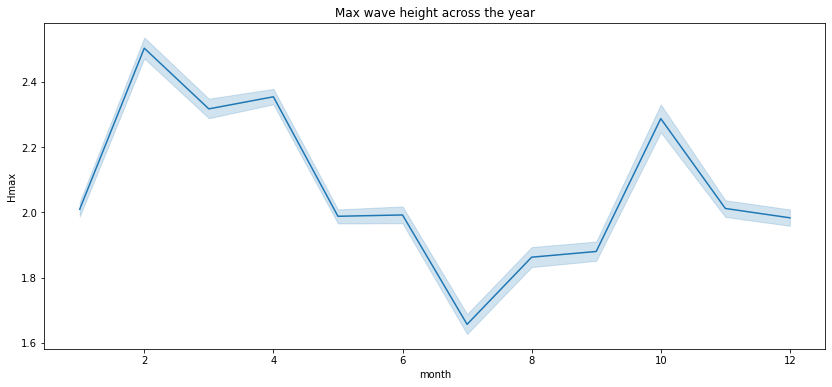

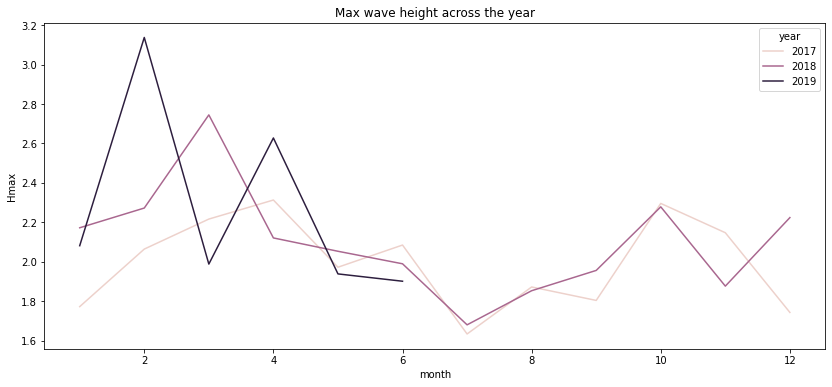

In [ ]:
#plotting the aggregated maximum wave height across the years
plt.figure(figsize=(14,6))
plt.title("Max wave height across the year")
sns.lineplot(x="month", y="Hmax", data=df1)

#plotting the variation in yearly max wave height across a year
plt.figure(figsize=(14,6))
plt.title("Max wave height across the year")
sns.lineplot(x="month", y="Hmax",hue = "year",ci= None, data=df1)

We further try to understand and visualize the relationship between the peak direction and our wave height. When plotting the aggregated wave height v/s the peak direction, we find the wave height to drop significantly after having a peak direction of 150 degrees. However there appears to be a sudden sharp peak in the height after 250 degrees, followed by a similarly sharp drop.

Upon observing the same plot for the three different years, we find that the sharp rsie and drop is a consequence of the 2019 data which recorded surprisingly high waves around 250 degrees.

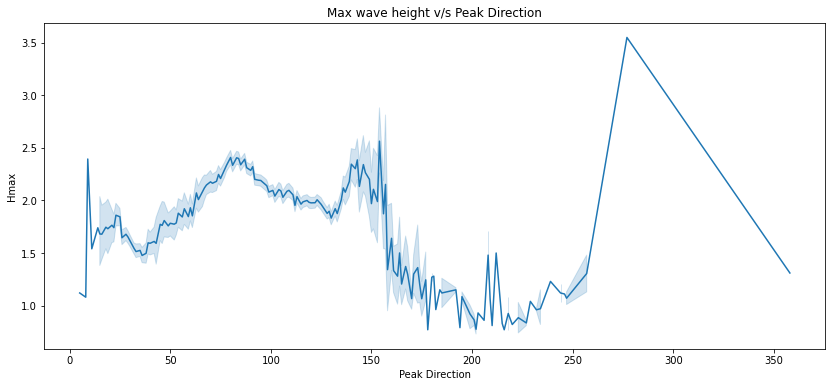

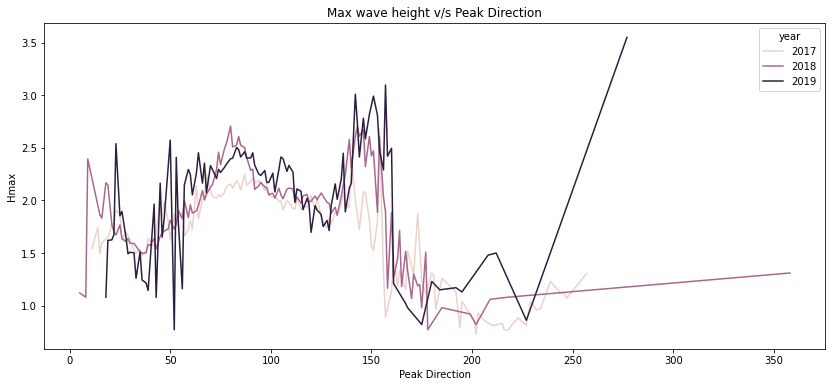

In [ ]:
#plotting the aggregated max wave height v/s the peak direction of the waves
plt.figure(figsize=(14,6))
plt.title("Max wave height v/s Peak Direction")
sns.lineplot(x="Peak Direction", y="Hmax", data=df1)

#plotting the max heaight v/s the peak direction of the waves for the three years
plt.figure(figsize=(14,6))
plt.title("Max wave height v/s Peak Direction")
sns.lineplot(x="Peak Direction", y="Hmax", hue = "year", ci = None, data=df1)

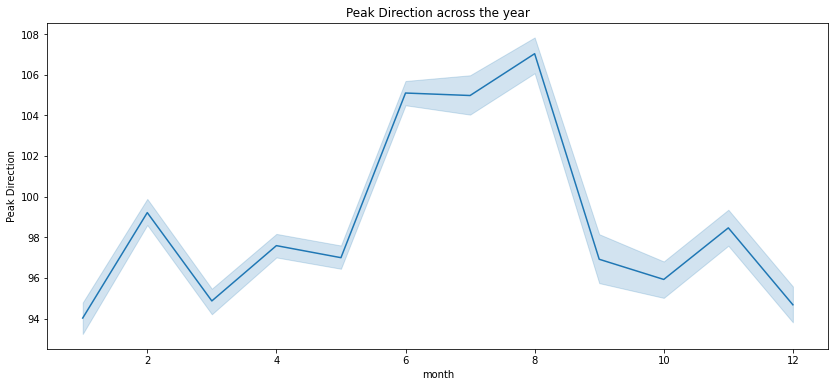

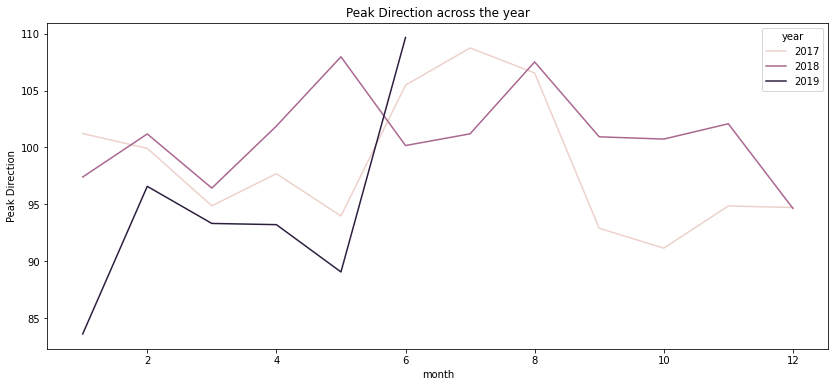

In [ ]:
#plotting the aggregated peak direction across the years
plt.figure(figsize=(14,6))
plt.title("Peak Direction across the year")
sns.lineplot(x="month", y="Peak Direction",data=df1)

#plotting the variation in yearly peak direction across a year
plt.figure(figsize=(14,6))
# Add title
plt.title("Peak Direction across the year")
sns.lineplot(x="month", y="Peak Direction",hue = "year",ci = None ,data=df1)

## Predicting wave height for 2019 using the 2017 – 2018 data

The 2017-2018 data is used as our training data set to predict the 2019 max wave height. The test data is the original 2019 data for the max wave height.

We use XGBoost Regressor for forecasting the wave height for 2019. It is an ensemble learning method that will create a final model by combining several weak models. Further XGBoost is known to provide accurate and faster predictions than a few of the traditional forecasting models (eg - ARIMA).

The model gave us an accuracy of 94.9% on our training set and 94.2% on our test data set. The predcitions are further visualized as well, and the model yileds us pretty satisfactory results.



**IMPROVEMENTS and FUTURE WORK-**

There are multiple areas where this model and even the pre-processing steps can be fine tuned further. 
With respect to the model, it's hyperparameter tuning could have been performed using cross valdiation techniques, i.e., GridSearch CV. Other alternatives such as an LSTM model would have worked well too in predicting our results. Even though in a few cases XGBoost Regressor is known to perform better than the ARIMA model, the ARIMA model could have also been implemented for a comparitive study.

The preprocessing can be further refined too. If we had a few more features, performing dimensionality reduction by doing PCA would have been benficial in obtaining the most important features. An in depth outlier detection could have been performed too, which might explain the erroneous 2019 data, especially for the Peak Direction variable.
 



In [ ]:
#setting Date/Time as index
df1 = df1.set_index('Date/Time')
df1.index = pd.to_datetime(df1.index)


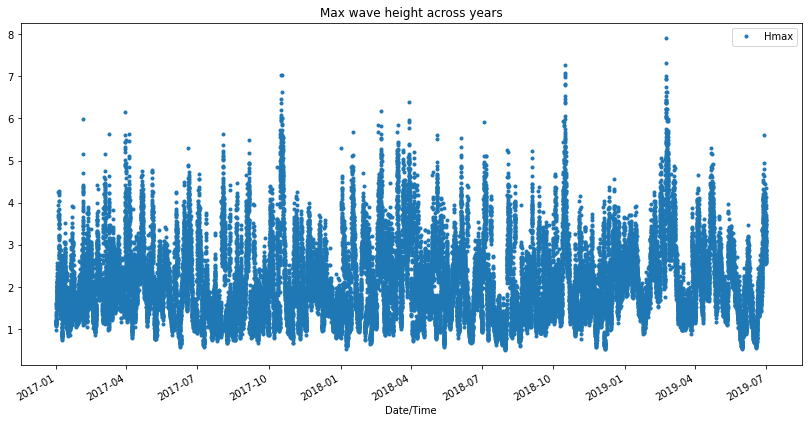

In [ ]:
#plotting the max wave height across all three years 
df1.plot(style='.',y = "Hmax",
        figsize=(14, 7),
        title='Max wave height across years')
plt.show()

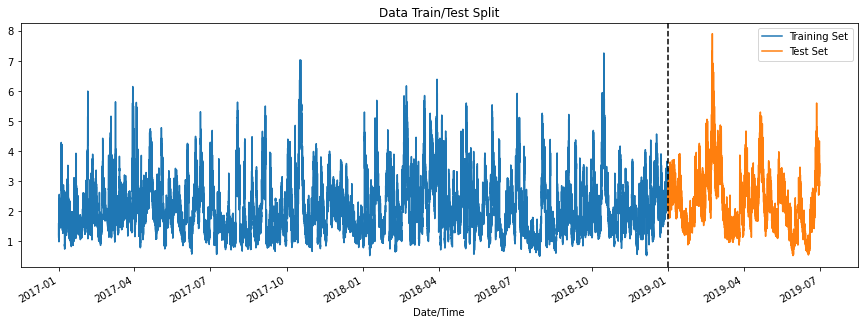

In [ ]:
#creating train data and test data
train = df1[df1.index < pd.to_datetime("01-01-2019", format='%d-%m-%Y')]
test = df1[df1.index > pd.to_datetime("01-01-2019", format='%d-%m-%Y')]

#plotting the train and test data, highlighting our 2019 test data with orange
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax,y="Hmax" ,label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax,y = "Hmax", label='Test Set')
ax.axvline('01-01-2019', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [ ]:
#assigning features and the target variable
X = ['Hs', 'Tz', 'Tp', 'Peak Direction', 'SST']
Y = ['Hmax']

In [ ]:
#creating train and test sets for our features and target variable
X_train = train[X]
y_train = train[Y]

X_test = test[X]
y_test = test[Y]

In [ ]:
#implementing a XGBRegressor for predicting the 2019 data
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
#fitting the model over our train and test sets
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[15:02:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.76511	validation_1-rmse:1.97167
[100]	validation_0-rmse:0.678667	validation_1-rmse:0.76074
[200]	validation_0-rmse:0.314148	validation_1-rmse:0.35066
[300]	validation_0-rmse:0.22096	validation_1-rmse:0.244347
[400]	validation_0-rmse:0.203888	validation_1-rmse:0.226791
[500]	validation_0-rmse:0.200797	validation_1-rmse:0.224096
[600]	validation_0-rmse:0.199785	validation_1-rmse:0.22357
[700]	validation_0-rmse:0.199382	validation_1-rmse:0.22342
[800]	validation_0-rmse:0.199032	validation_1-rmse:0.223366
[900]	validation_0-rmse:0.19875	validation_1-rmse:0.223406
[999]	validation_0-rmse:0.198523	validation_1-rmse:0.223423


XGBRegressor(early_stopping_rounds=50, learning_rate=0.01, n_estimators=1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


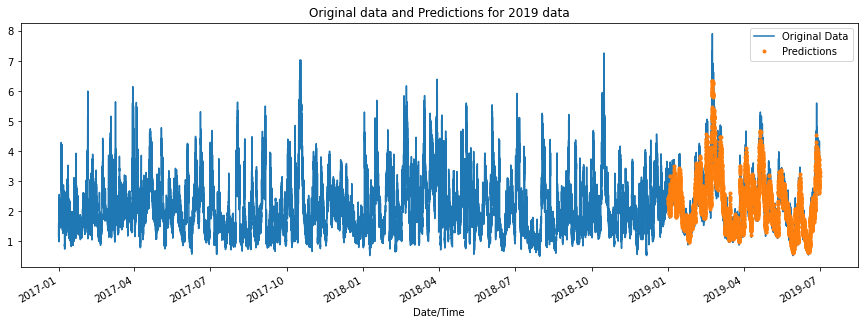

In [ ]:
#getting the predictions from our model over the X_test dataset
test['prediction'] = reg.predict(X_test)

#merging our original dataframe with our new predicted values
df1 = df1.merge(test[['prediction']], how='left', left_index=True, right_index=True)

#plotting the predictions over our original dataset
ax = df1[['Hmax']].plot(figsize=(15, 5))
df1['prediction'].plot(ax=ax, style='.')
plt.legend(['Original Data', 'Predictions'])
ax.set_title('Original data and Predictions for 2019 data')
plt.show()

In [ ]:
#getting the y_train and y_test predicted values
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

In [ ]:
#evaluating model accuracy using score
accuracy_train = reg.score(X_train, y_train)
accuracy_test = reg.score(X_test, y_test)
print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')

Accuracy, Training Set:  94.97956 %
Accuracy, Test Set:  94.13594 %
